In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/chipseq/'

/content/drive/My Drive/results/chipseq


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

  Using cached https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
ls

Arid3_cnn_deep_exponential_results.pickle
Arid3_cnn_deep_exponential_results_seq.pickle
Arid3_cnn_deep_relu_results.pickle
Arid3_cnn_deep_relu_results_seq.pickle
Arid3_cnn_shallow_exponential_results.pickle
Arid3_cnn_shallow_exponential_results_seq.pickle
Arid3_cnn_shallow_relu_results.pickle
Arid3_cnn_shallow_relu_results_seq.pickle
ATF2_cnn_deep_exponential_results.pickle
ATF2_cnn_deep_exponential_results_seq.pickle
ATF2_cnn_deep_relu_results.pickle
ATF2_cnn_deep_relu_results_seq.pickle
ATF2_cnn_shallow_exponential_results.pickle
ATF2_cnn_shallow_exponential_results_seq.pickle
ATF2_cnn_shallow_relu_results.pickle
ATF2_cnn_shallow_relu_results_seq.pickle
BACH1_cnn_deep_exponential_results.pickle
BACH1_cnn_deep_exponential_results_seq.pickle
BACH1_cnn_deep_relu_results.pickle
BACH1_cnn_deep_relu_results_seq.pickle
BACH1_cnn_shallow_exponential_results.pickle
BACH1_cnn_shallow_exponential_results_seq.pickle
BACH1_cnn_shallow_relu_results.pickle
BACH1_cnn_shallow_relu_results_seq.pickle


In [6]:
import pickle

experiments = ['CTCF', 'MAX', 'ATF2', 'Arid3', 'BACH1', 'GABPA', 'ZNF24', 'ELK1', 'SRF', 'REST']

file_cnn_deep_relu = {}
file_cnn_deep_exp = {}
file_cnn_shallow_relu = {}
file_cnn_shallow_exp = {}

for experiment in experiments: 
    file_cnn_deep_relu[experiment] = open(experiment + "_cnn_deep_relu_results.pickle", "rb")
    file_cnn_deep_exp[experiment] = open(experiment + "_cnn_deep_exponential_results.pickle", "rb")
    file_cnn_shallow_relu[experiment] = open(experiment + "_cnn_shallow_relu_results.pickle", "rb")
    file_cnn_shallow_exp[experiment] = open(experiment + "_cnn_shallow_exponential_results.pickle", "rb")

In [7]:
# It may be memory-intensive to load all experiments at once; if this is the case, pick and plot one experiment only, or a few. You may avoid the largest experiment (CTCF).  
#experiment = "REST"

results={}
results['deep_relu'] = {}
results['deep_exp'] = {}
results['shallow_relu'] = {}
results['shallow_exp'] = {}

for experiment in experiments: 
    print('loading ', experiment)
    results['deep_relu'][experiment] = pickle.load(file_cnn_deep_relu[experiment])
    results['deep_exp'][experiment] = pickle.load(file_cnn_deep_exp[experiment])
    results['shallow_relu'][experiment] = pickle.load(file_cnn_shallow_relu[experiment])
    results['shallow_exp'][experiment] = pickle.load(file_cnn_shallow_exp[experiment])

loading  CTCF
loading  MAX
loading  ATF2
loading  Arid3
loading  BACH1
loading  GABPA
loading  ZNF24
loading  ELK1
loading  SRF
loading  REST


In [8]:
cnn_models= ['deep_relu', 'deep_exp', 'shallow_relu', 'shallow_exp']

Angles={}
Angles_ensemble={}
#Scores={}
#Scores_ensemble={}
Dispersion={}
Dispersion_adj={}
Count_angles={}
for cnn_model in cnn_models:
    Angles[cnn_model]={}
    Angles_ensemble[cnn_model]={}
    #Scores[cnn_model]={}
    #Scores_ensembl[cnn_model]={}
    Dispersion[cnn_model]={}
    Dispersion_adj[cnn_model]={}
    Count_angles[cnn_model]={}
    for experiment in experiments: 
        Angles[cnn_model][experiment]=np.array(results[cnn_model][experiment]['angles'])
        Angles_ensemble[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['ensemble_angles'])
        #Scores[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['scores'])
        #Scores_ensemble[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['ensemble_scores'])
        Dispersion[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['dispersion'])
        Dispersion_adj[cnn_model][experiment]=np.array(results[cnn_model][experiment]['saliency']['adj_dispersion'])
        Count_angles[cnn_model][experiment]={}
        Count_angles[cnn_model][experiment]['30']=np.array(results[cnn_model][experiment]['count_angles']['30'])
        Count_angles[cnn_model][experiment]['45']=np.array(results[cnn_model][experiment]['count_angles']['45'])
        Count_angles[cnn_model][experiment]['60']=np.array(results[cnn_model][experiment]['count_angles']['60'])


# ANGLE STATISTICS

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 

# Angle distributions

In [12]:
cnn_model = 'deep_exp' # Pick a model from: ['deep_relu', 'deep_exp', 'shallow_relu', 'shallow_exp']

sine={}
sine_ensemble={}
sine_flattened={}
sine_ensemble_flattened={}

for experiment in experiments: 
    sine[experiment] = np.array(Angles[cnn_model][experiment])
    sine_ensemble[experiment] = np.array(Angles_ensemble[cnn_model][experiment])
    sine_flattened[experiment] = np.reshape(sine[experiment],[-1])  
    sine_ensemble_flattened[experiment] = np.reshape(sine_ensemble[experiment],[-1]) 

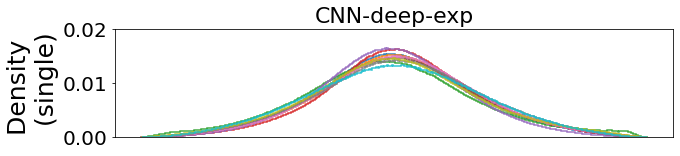

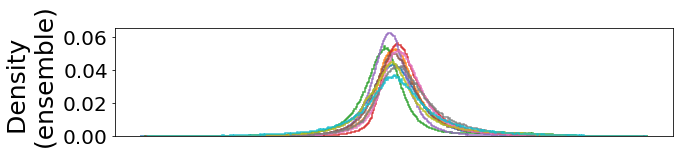

In [13]:
#Plot all experiments angle distribution

model_=""
if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"

plt.figure(figsize=(10,2))
plt.ylabel('Density \n (single)', fontsize=25)  # plt.ylabel('Density \n (single)', fontsize=25)
plt.xticks(fontsize=22)
plt.title(model_, fontsize=22)
plt.ylim((0,0.02))
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)   #Turn off x ticks
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
for experiment in experiments:
    plt.hist(sine_flattened[experiment], 500, density=True, alpha=0.9, histtype='step', linewidth=1.5)

#second distribution 
plt.figure(figsize=(10,2))
plt.ylabel('Density \n (ensemble)', fontsize=25)  # plt.ylabel('Density \n (ensemble)', fontsize=25)
plt.xticks(fontsize=22)
plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)    #Turn off x ticks
plt.yticks(ticks=[0.0, 0.02, 0.04, 0.06], fontsize=20)
for experiment in experiments:
    plt.hist(sine_ensemble_flattened[experiment], 500, density=True, alpha=0.9, histtype='step', linewidth=1.5)

In [14]:
print ( np.mean(np.nan_to_num(sine_flattened[experiment])) )
print ( np.std(np.nan_to_num(sine_flattened[experiment])) )
print(sine_flattened[experiment].shape)

0.80032444
29.973635
(12570000,)


# Dispersion - calculate and save (do this once)

In [38]:
#Select a cnn_model model from ['deep_relu', 'deep_exp', 'shallow_relu', 'shallow_exp']
cnn_model = 'deep_relu'  #Do this for all 4 models 

In [39]:
# Calculate and dispersion bins and save (do this only once). May take a while. Otherwise, skip this step, use already calculated and saved files, and load them following the cells below. 

import os
from six.moves import cPickle

sine={}
sine_flattened={}

for experiment in experiments: 
    sine[experiment] = np.array(Angles[cnn_model][experiment])
    sine_flattened[experiment] = np.reshape(sine[experiment],[-1])  

dispersion_bins= geomath.dispersion_bins_func(experiments, Dispersion[cnn_model], sine_flattened) 
dispersion_bins_corrected = geomath.dispersion_bins_func(experiments, Dispersion_adj[cnn_model], sine_flattened) 

# SAVE dispersion bins results: 
filename1 = os.path.join(cnn_model + '_dispersion_bins.pickle')
filename2 = os.path.join(cnn_model + '_dispersion_bins_corr.pickle')

with open(filename1, 'wb') as f:
    cPickle.dump(dispersion_bins, f, protocol=cPickle.HIGHEST_PROTOCOL)
with open(filename2, 'wb') as f:
    cPickle.dump(dispersion_bins_corrected, f, protocol=cPickle.HIGHEST_PROTOCOL)  

# Load dispersion results and plot


In [70]:
def load_dispersion(cnn_model, experiments):
    import os
    from six.moves import cPickle
    filename1 = os.path.join(cnn_model + '_dispersion_bins.pickle')
    filename2 = os.path.join(cnn_model + '_dispersion_bins_corr.pickle')
    file1 = open(cnn_model + '_dispersion_bins.pickle', "rb")
    file2 = open(cnn_model + '_dispersion_bins_corr.pickle', "rb")
    dispersion_bins = pickle.load(file1)
    dispersion_bins_corrected = pickle.load(file2)  
    return dispersion_bins, dispersion_bins_corrected

In [77]:
def rename_model(cnn_model):
    model_=""
    if (cnn_model=='deep_relu'): model_ = "CNN-deep-relu"
    if (cnn_model=='deep_exp'): model_ = "CNN-deep-exp"
    if (cnn_model=='shallow_relu'): model_ = "CNN-shallow-relu"
    if (cnn_model=='shallow_exp'): model_ = "CNN-shallow-exp"  
    return model_

In [78]:
experiments = ['CTCF', 'MAX', 'ATF2', 'Arid3', 'BACH1', 'GABPA', 'ZNF24', 'ELK1', 'SRF', 'REST']

CNN-deep-exp

In [79]:
cnn_model = 'deep_exp'

In [80]:
dispersion_bins, dispersion_bins_corrected = load_dispersion(cnn_model, experiments)
sine_bins = np.arange(-90,91,5).astype(float)

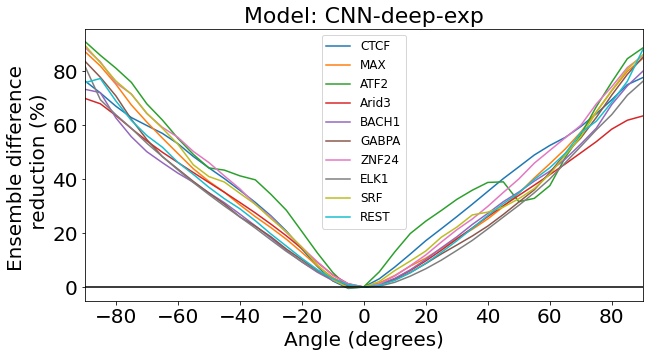

In [81]:
plt.figure(figsize=(10,5))
for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.legend(experiments, fontsize=12)
plt.xlabel('Angle (degrees)', fontsize=20)
plt.ylabel('Ensemble difference \n reduction (%)', fontsize=20)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=20)
plt.yticks( fontsize=20)
plt.axhline(0, color='black')
plt.xlim((-90,90))
model_=rename_model(cnn_model)
plt.title("Model: "+ model_, fontsize=22)
plt.show()

CNN-deep-relu

In [82]:
cnn_model = 'deep_relu'

In [83]:
dispersion_bins, dispersion_bins_corrected = load_dispersion(cnn_model, experiments)
sine_bins = np.arange(-90,91,5).astype(float)

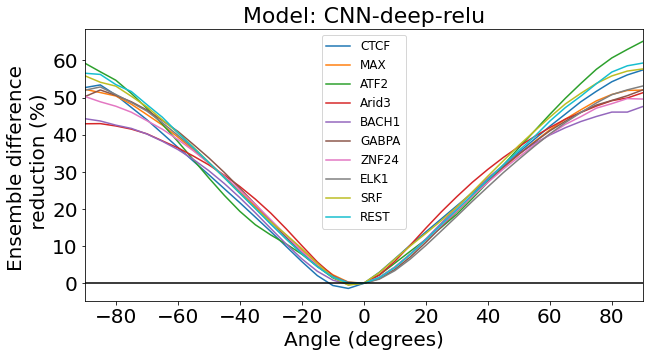

In [84]:
plt.figure(figsize=(10,5))
for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.legend(experiments, fontsize=12)
plt.xlabel('Angle (degrees)', fontsize=20)
plt.ylabel('Ensemble difference \n reduction (%)', fontsize=20)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=20)
plt.yticks( fontsize=20)
plt.axhline(0, color='black')
plt.xlim((-90,90))
model_=rename_model(cnn_model)
plt.title("Model: "+ model_, fontsize=22)
plt.show()

CNN-shallow-exp

In [88]:
cnn_model = 'shallow_exp'

In [89]:
dispersion_bins, dispersion_bins_corrected = load_dispersion(cnn_model, experiments)
sine_bins = np.arange(-90,91,5).astype(float)

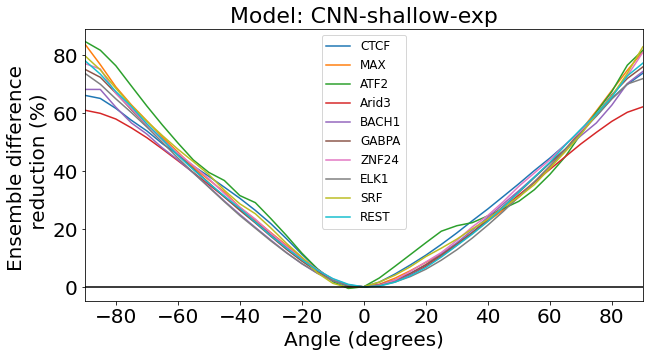

In [90]:
plt.figure(figsize=(10,5))
for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.legend(experiments, fontsize=12)
plt.xlabel('Angle (degrees)', fontsize=20)
plt.ylabel('Ensemble difference \n reduction (%)', fontsize=20)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=20)
plt.yticks( fontsize=20)
plt.axhline(0, color='black')
plt.xlim((-90,90))
model_=rename_model(cnn_model)
plt.title("Model: "+ model_, fontsize=22)
plt.show()

In [91]:
cnn_model = 'shallow_relu'

In [92]:
dispersion_bins, dispersion_bins_corrected = load_dispersion(cnn_model, experiments)
sine_bins = np.arange(-90,91,5).astype(float)

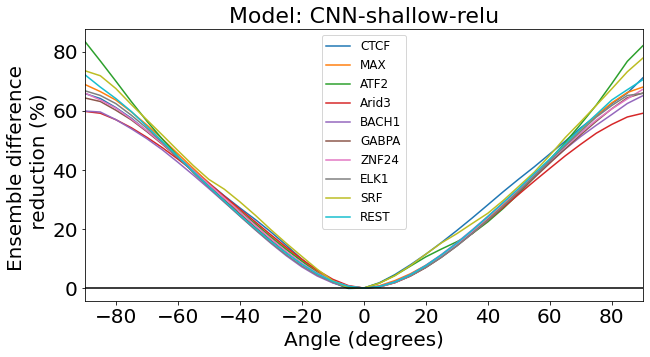

In [93]:
plt.figure(figsize=(10,5))
for experiment in experiments:
    plt.plot(sine_bins, (dispersion_bins[experiment]-dispersion_bins_corrected[experiment])/dispersion_bins[experiment]*100, '-',linewidth=1.5) #color='red'

plt.legend(experiments, fontsize=12)
plt.xlabel('Angle (degrees)', fontsize=20)
plt.ylabel('Ensemble difference \n reduction (%)', fontsize=20)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=20)
plt.yticks( fontsize=20)
plt.axhline(0, color='black')
plt.xlim((-90,90))
model_=rename_model(cnn_model)
plt.title("Model: "+ model_, fontsize=22)
plt.show()

# FURTHER ANGLE STATISTICS

In [94]:
#Synthetic:
syn_30={}
syn_45={}
syn_60={}

syn_30['deep_relu']=29.50692
syn_45['deep_relu']=12.31788
syn_60['deep_relu']=3.70454

syn_30['deep_exp']=38.16202
syn_45['deep_exp']=21.3651
syn_60['deep_exp']=10.69586

syn_30['shallow_relu']=36.62498
syn_45['shallow_relu']=17.34672
syn_60['shallow_relu']=6.00062

syn_30['shallow_exp']=40.59734
syn_45['shallow_exp']=22.54262
syn_60['shallow_exp']=10.5067

In [99]:
#Select a cnn_model from  ['deep_relu', 'deep_exp', 'shallow_relu', 'shallow_exp']
cnn_model = 'deep_relu'

angle_30=[]
angle_45=[]
angle_60=[]
for experiment in experiments:
    angle_30.append(np.average(Count_angles[cnn_model][experiment]['30']))
    angle_45.append(np.average(Count_angles[cnn_model][experiment]['45']))
    angle_60.append(np.average(Count_angles[cnn_model][experiment]['60']))

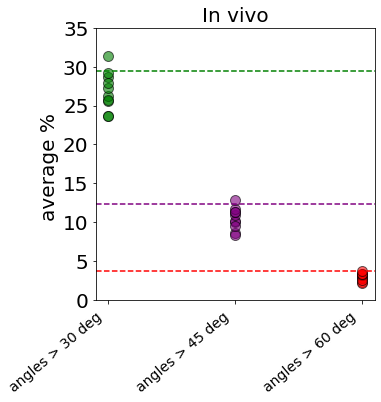

In [103]:
#Plot in-vivo percentages of angles above tresholds (scatter plot), and same value for synthetic (dashed line)
data = np.array ([angle_30, angle_45, angle_60])
model_=rename_model(cnn_model)
figure_title = model_
fig = plt.figure(figsize=(5,5))  #(5,10)
plt.scatter([0]*10, data[0], color='green', alpha=0.6, s=100, edgecolor='black')
plt.scatter([1]*10, data[1], color='purple', alpha=0.6, s=100, edgecolor='black')
plt.scatter([2]*10, data[2], color='red', alpha=0.6, s=100, edgecolor='black')

plt.xticks([0, 1, 2], [ 'angles > 30 deg ', 'angles > 45 deg ',  'angles > 60 deg '], rotation=40, fontsize=14, ha='right');  #  ''
ax = plt.gca();
ax.set_ylim(0,35)  #45 
ax.set_title('In vivo', fontsize=20)
plt.setp(ax.get_yticklabels(),fontsize=20);
plt.ylabel('average % ', fontsize=20)
plt.axhline(y=syn_30[cnn_model], color='green', linestyle='--')
plt.axhline(y=syn_45[cnn_model], color='purple', linestyle='--')
plt.axhline(y=syn_60[cnn_model], color='red', linestyle='--')
plt.show()